In [1]:
pip install yfinance pandas matplotlib --upgrade --no-cache-dir 

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------------- -------------------- 3.9/8.0 MB 19.6 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 18.7 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.3
    Uninstalling matplotlib-3.9.3:
      Successfully uninstalled matplotlib-3.9.3
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.50
    Uninstalling yfinance-0.2.50:
      Successfully uninstalled yfinance-0.2.50
Note: you may need to restart the kernel to use updated packages.


In [2]:
#import yahoo finance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Download Apple stock data for 2023
data = yf.download("AAPL", start="2022-01-01", end="2024-01-01")
close_prices = data['Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
data['1_day_MA'] = close_prices.rolling(window=1).mean()
data['3_day_MA'] = close_prices.rolling(window=3).mean()
data['5_day_MA'] = close_prices.rolling(window=5).mean()
data['10_day_MA'] = close_prices.rolling(window=10).mean()
data['50_day_MA'] = close_prices.rolling(window=50).mean()
data[['Close', '1_day_MA', '3_day_MA', '5_day_MA', '10_day_MA', '50_day_MA']].to_csv("aaapl_MA.csv")

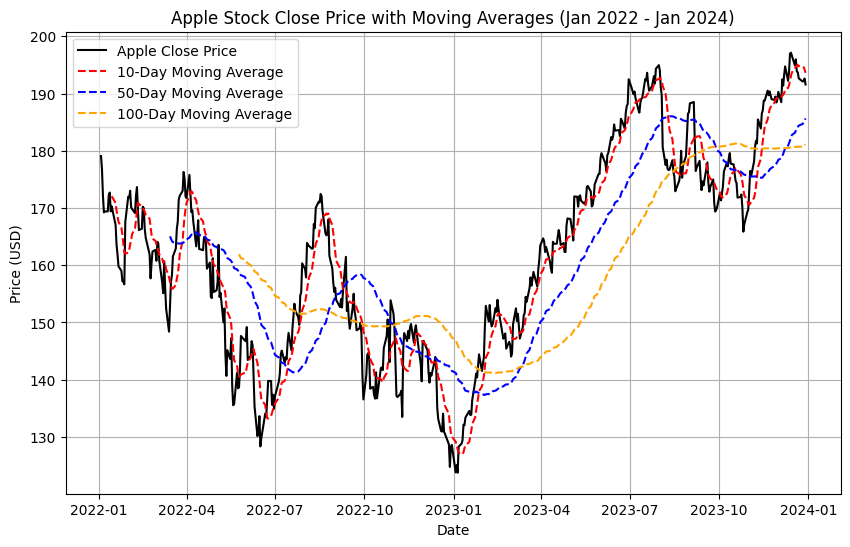

In [7]:
# Plot the closing price and the 10-day moving average
plt.figure(figsize=(10, 6))
plt.plot(data.index, close_prices, label='Apple Close Price', color='black')
#plt.plot(data.index, data['5_day_MA'], label='5-Day Moving Average', color='red', linestyle='--')
plt.plot(data.index, data['10_day_MA'], label='10-Day Moving Average', color='red', linestyle='--')
#plt.plot(data.index, data['20_day_MA'], label='20-Day Moving Average', color='orange', linestyle='--')
#plt.plot(data.index, data['30_day_MA'], label='30-Day Moving Average', color='yellow', linestyle='--')
plt.plot(data.index, data['50_day_MA'], label='50-Day Moving Average', color='blue', linestyle='--')
plt.plot(data.index, data['100_day_MA'], label='100-Day Moving Average', color='orange', linestyle='--')
plt.title("Apple Stock Close Price with Moving Averages (Jan 2022 - Jan 2024)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#### ses_model = ExponentialSmoothing(close_prices, trend=None, seasonal=None, initialization_method="estimated")
ses_fit = ses_model.fit(smoothing_level=0.2, optimized=False)

# Forecast using the fitted model
ses_forecast = ses_fit.fittedvalues

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(data.index, close_prices, label='Apple Close Price', color='blue')
plt.plot(data.index, ses_forecast, label='SES Forecast', color='red', linestyle='--')
plt.title("Apple Stock Close Price with Simple Exponential Smoothing (Jan 2023 - Jan 2024)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()